# Regresión polinómica

Como observamos, la regresión lineal tiene problemas para representar correlaciones no lineales de datos tal y como se ilustraba en el siguiente ejemplo:

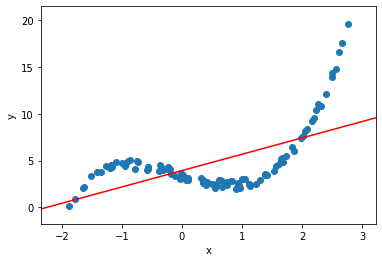

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

n_samples = 100

np.random.seed(43)

X = np.expand_dims(np.linspace(-2, 2, n_samples), axis=1) + np.random.rand(n_samples,1)
y = 3 - 2 * X + X * X * X + np.random.rand(n_samples,1)

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X, y)

reg = LinearRegression().fit(X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, c='red')

plt.show()

Para corregir este problema surge la regresión polinómica que es, a todos los efectos, una regresión lineal (a la que puede añadirse regularización o no), solo que se ha ampliado su forma normal para dar cabida a polinomios de orden superior. En otras palabras, consiste en ajustar un modelo que sigue la forma:

$$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_g x^g$$

Es decir, convertimos nuestra función a un polinomio de grado $g$.

Para ello en `sklearn` disponemos de la herramienta de preprocesamiento `preprocessing.PolynomialFeatures` que permite transformar cualquier conjunto de datos en un nuevo conjunto de datos con características (*features*) polinómicas e interrelacionadas. Por ejemplo, si nuestro conjunto de datos dispone de las características $x_1$ y $x_2$ y queremos un polinomio de grado 3, `PolynomialFeatures` extenderá las características de nuestro conjunto dando como resultado $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1 \cdot x_2$, $x_1^3$, $x_2^3$, $x_1^2 \cdot x_2$ y $x_1 \cdot x_2^2$. Obsérvese el crecimiento exponencial del conjunto de datos para polinomios de alto grado.

Partiendo del conjunto de datos anterior:

In [2]:
X

array([[-1.88494543],
       [-1.35052942],
       [-1.78580096],
       [-1.63819826],
       [-1.51124478],
       [-0.93884231],
       [-1.09148554],
       [-1.1760095 ],
       [-1.64775385],
       [-0.90261534],
       [-1.20100958],
       [-0.75350844],
       [-1.26073039],
       [-1.41786254],
       [-0.56769479],
       [-1.1729104 ],
       [-0.94854591],
       [-0.99703484],
       [-1.19606457],
       [-0.38909854],
       [-0.34298004],
       [-0.18005006],
       [-0.7257342 ],
       [-0.11621895],
       [-0.58454467],
       [-0.32017434],
       [-0.8669949 ],
       [-0.01199233],
       [-0.57068337],
       [-0.56597801],
       [-0.78274924],
       [-0.20427223],
       [-0.23147434],
       [-0.03029299],
       [ 0.35194151],
       [ 0.32280417],
       [ 0.36469853],
       [ 0.02020517],
       [-0.36062751],
       [-0.24332783],
       [ 0.56920184],
       [ 0.06851864],
       [ 0.56198682],
       [ 0.40955102],
       [ 0.40656357],
       [ 0

Podemos generar un polinomio de grado 3:

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly_X = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)
poly_X

array([[-1.88494543e+00,  3.55301929e+00, -6.69724748e+00],
       [-1.35052942e+00,  1.82392972e+00, -2.46327074e+00],
       [-1.78580096e+00,  3.18908505e+00, -5.69507113e+00],
       [-1.63819826e+00,  2.68369354e+00, -4.39642208e+00],
       [-1.51124478e+00,  2.28386079e+00, -3.45147271e+00],
       [-9.38842307e-01,  8.81424877e-01, -8.27518965e-01],
       [-1.09148554e+00,  1.19134069e+00, -1.30033115e+00],
       [-1.17600950e+00,  1.38299836e+00, -1.62641921e+00],
       [-1.64775385e+00,  2.71509276e+00, -4.47380455e+00],
       [-9.02615340e-01,  8.14714452e-01, -7.35373762e-01],
       [-1.20100958e+00,  1.44242401e+00, -1.73236505e+00],
       [-7.53508437e-01,  5.67774965e-01, -4.27823226e-01],
       [-1.26073039e+00,  1.58944111e+00, -2.00385672e+00],
       [-1.41786254e+00,  2.01033418e+00, -2.85037752e+00],
       [-5.67694793e-01,  3.22277379e-01, -1.82955190e-01],
       [-1.17291040e+00,  1.37571880e+00, -1.61359489e+00],
       [-9.48545905e-01,  8.99739335e-01

Con este nuevo polinomio, procedemos a entrenar el modelo anterior y ver la nueva linea (ya no es recta) de regresión:

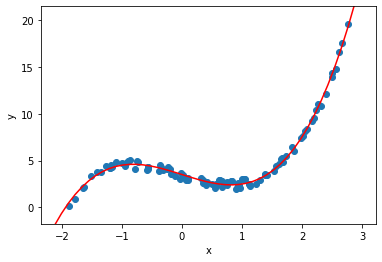

In [4]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X, y)

reg = LinearRegression().fit(poly_X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x).reshape(-1, 1)
xs = PolynomialFeatures(degree=3, include_bias=False).fit_transform(line)
ys = reg.predict(xs)

plt.plot(xs[:,0], ys, c='red')

plt.show()

Cuando trabajamos con regresión polinómica con `sklearn` lo más habitual es juntar las fases `PolynomialFeatures` y `Regression` en un `Pipeline`. De este modo, de forma simple, podemos crear un modelo parametrizable para especificar, por ejemplo, el grado del polinomio y el coeficiente de regularización.

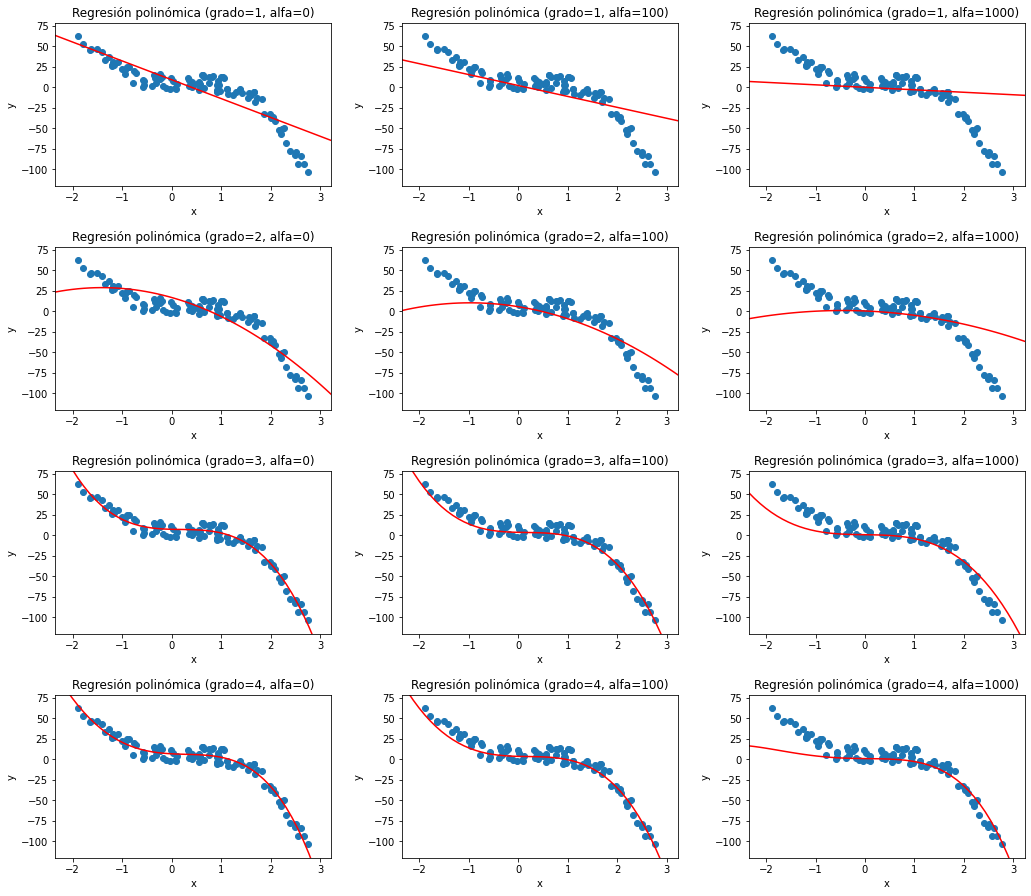

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

n_samples = 100
np.random.seed(43)

X = np.expand_dims(np.linspace(-2, 2, n_samples), axis=1) + np.random.rand(n_samples,1)
y = - 3 - X + 4*X*X - 7*X*X*X + 20 * np.random.rand(n_samples,1)

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('ridge', Ridge())])

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,13))
fig.tight_layout(pad=4.0)

for i, degree in enumerate([1, 2, 3, 4]):
    for j, alpha in enumerate([0, 100, 1000]):
        axs[i,j].set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
        axs[i,j].set_ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

        axs[i,j].set_title('Regresión polinómica (grado=' + str(degree) + ', alfa=' + str(alpha) + ')')
        axs[i,j].set_xlabel('x')
        axs[i,j].set_ylabel('y')
        
        pipe.set_params(poly__degree=degree, ridge__alpha=alpha, ridge__fit_intercept=False)
        
        pipe.fit(X, y)

        axs[i,j].scatter(X, y)
        
        linespace = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
        axs[i,j].plot(linespace, pipe.predict(line.reshape(-1, 1)), c='red')

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">